In [5]:
import pandas as pd

In [6]:
#Raw data paths
train_path = "../data/raw/train_FD001.txt"
test_path = "../data/raw/test_FD001.txt"
rul_path = "../data/raw/RUL_FD001.txt"

In [7]:
col_names = ["engine_id", "cycle", "setting_1", "setting_2", "setting_3",] + [f"sensor_{i}" for i in range(1,22)]

In [9]:
#Load data
train_df = pd.read_csv(train_path, sep="\s+", header=None)
train_df.columns = col_names


In [10]:
train_df.shape

(20631, 26)

In [11]:
# Number of engines
train_df['engine_id'].nunique()

100

In [12]:
# How long each engine runs
train_df.groupby('engine_id')['cycle'].max().head()

engine_id
1    192
2    287
3    179
4    189
5    269
Name: cycle, dtype: int64

In [13]:
import matplotlib.pyplot as plt

In [14]:
engine_1 = train_df[train_df['engine_id'] == 1]

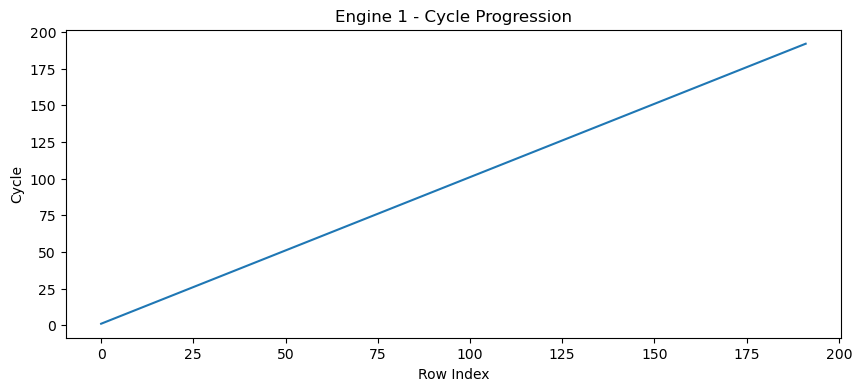

In [15]:
plt.figure(figsize=(10,4))
plt.plot(engine_1['cycle'])
plt.title("Engine 1 - Cycle Progression")
plt.xlabel("Row Index")
plt.ylabel("Cycle")
plt.show()

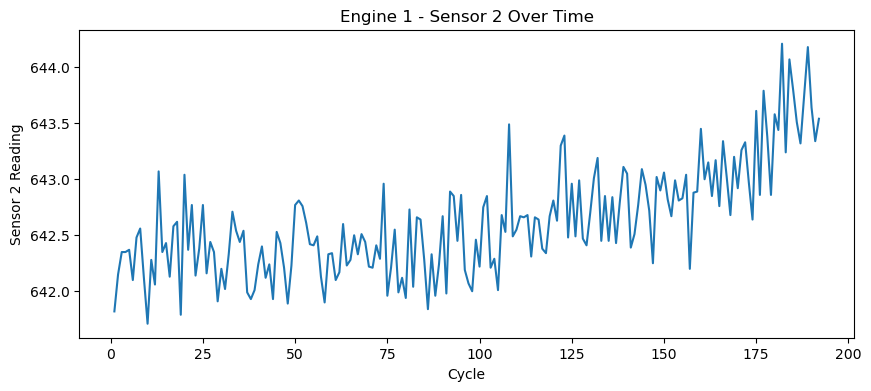

In [16]:
plt.figure(figsize=(10,4))
plt.plot(engine_1['cycle'], engine_1['sensor_2'])
plt.title("Engine 1 - Sensor 2 Over Time")
plt.xlabel("Cycle")
plt.ylabel("Sensor 2 Reading")
plt.show()

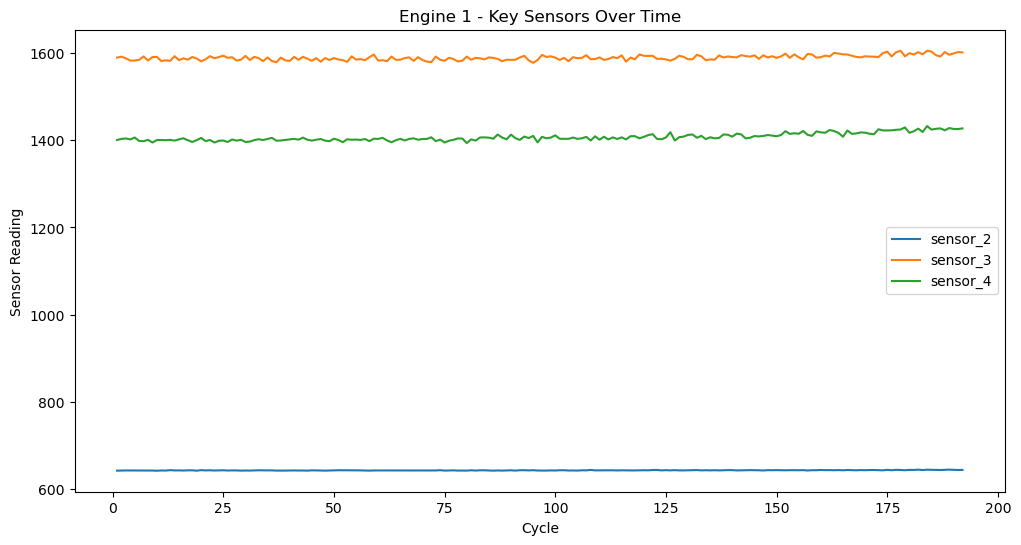

In [17]:
sensors_to_plot = ['sensor_2', 'sensor_3', 'sensor_4']

plt.figure(figsize=(12,6))

for s in sensors_to_plot:
    plt.plot(engine_1['cycle'], engine_1[s], label=s)

plt.title("Engine 1 - Key Sensors Over Time")
plt.xlabel("Cycle")
plt.ylabel("Sensor Reading")
plt.legend()
plt.show()

In [18]:
train_df.groupby('engine_id').std().mean().sort_values().head(10)

setting_3    0.000000
sensor_1     0.000000
sensor_10    0.000000
sensor_5     0.000000
sensor_18    0.000000
sensor_19    0.000000
sensor_16    0.000000
setting_2    0.000290
sensor_6     0.000959
setting_1    0.002187
dtype: float64

In [19]:
train_df.groupby('engine_id').std().mean().sort_values().tail(10)

sensor_11     0.237445
sensor_2      0.462850
sensor_12     0.648178
sensor_7      0.786467
sensor_17     1.450997
sensor_3      5.788760
sensor_4      8.118497
sensor_14    11.804007
sensor_9     14.189053
cycle        59.700722
dtype: float64

In [23]:
train_df.to_pickle("../data/processed/train_FD001_processed.pkl")